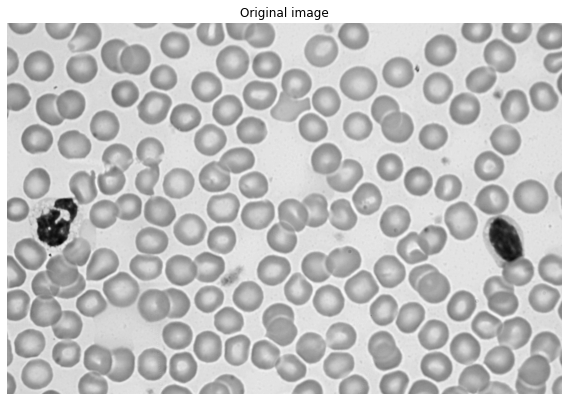

In [4]:
'''
____ Author____
Nazanin Mohammadrezaii-9733068

____ COURSE ____
Digital Image processing

____Homework_____
HW6_question 3

_____Intro_______
Applying Canny filter and Hough circle transform to detect circles of cells in the medical image

'''

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

################# Read the image ##############

img = cv.imread('CBC.jpg',flags=cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,8))
plt.imshow(img,vmin=img.min(),vmax=img.max(), cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.tight_layout()
plt.show()


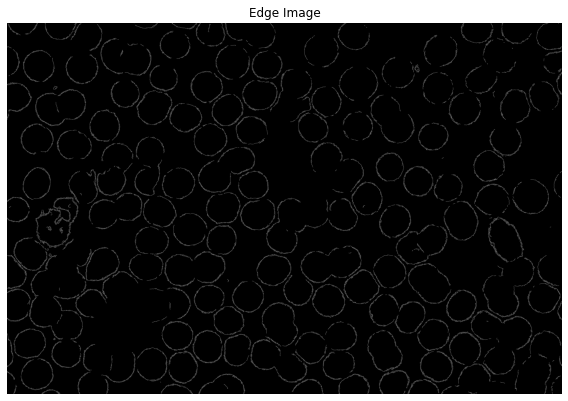

In [5]:
############### Canny filter for finding the best param1 in Hough transform #########

edges = cv.Canny(img,26,50)

plt.figure(figsize=(8,8))
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image');plt.axis(False)
plt.tight_layout()
plt.show()

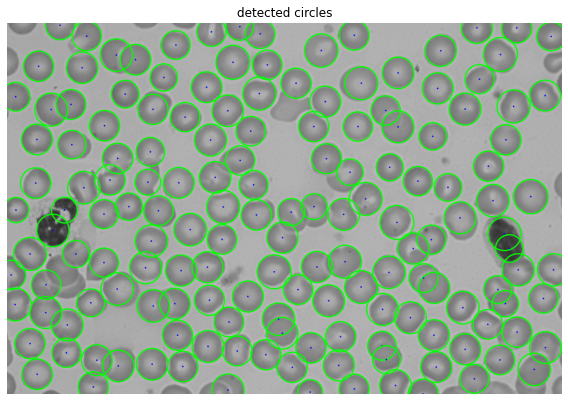

In [6]:
##################### Apply Hough circle transform ##########################

# grayscale image
img1 = cv.imread('CBC.jpg',flags=cv.IMREAD_GRAYSCALE)


img2 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)

# smoothen gray scale image with median kernel
smoothen = cv.medianBlur(img1,5)

# apply HoughCircles
circles = cv.HoughCircles(smoothen,method=cv.HOUGH_GRADIENT,dp=1,minDist=100, \
                            param1=26,param2=30,minRadius=80,maxRadius=120)
circles = np.uint16(np.around(circles))


# draw the circles
if circles is not None:
    for i in circles[0,:]:
        # draw the circle
        cv.circle(img2,(i[0],i[1]),i[2],(0,255,0),8)
        # draw the center of the circle
        cv.circle(img2,(i[0],i[1]),3,(0,0,255),3)

plt.figure(figsize=(8,8))
plt.title("detected circles")
plt.imshow(img2)
plt.axis('off')
plt.tight_layout()
plt.show()